In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [ ]:
np.random.seed(12)


n = 252

assetB_ret = np.random.normal(0.0005, 0.01, n)
assetA_ret = assetB_ret + np.random.normal(0, 0.005, n)

priceB = (1 + assetB_ret).cumprod() * 100
priceA = (1 + assetA_ret).cumprod() * 100

priceA = pd.Series(priceA)
priceB = pd.Series(priceB)

model = LinearRegression().fit(priceB.values.reshape(-1, 1), priceA.values)
beta = model.coef_[0]

spread = priceA - beta * priceB

roll_mean = spread.rolling(20).mean()
roll_std  = spread.rolling(20).std()

Z = (spread - roll_mean) / roll_std

signal = []

for z in Z:
    if z > 1:
        signal.append(-1)   # short A, long B
    elif z < -1:
        signal.append(1)    # long A, short B
    else:
        signal.append(0)

signal = pd.Series(signal)

spread_ret = spread.diff() / spread.shift(1)
strategy_ret = signal.shift(1) * spread_ret
strategy_ret = strategy_ret.fillna(0)

strategy_cum = (1 + strategy_ret).cumprod()

def max_drawdown(series):
    peak = series.cummax()
    dd = (series - peak) / peak
    return dd.min()

final_value = strategy_cum.iloc[-1]
sharpe = (strategy_ret.mean() / strategy_ret.std()) * np.sqrt(252)
mdd = max_drawdown(strategy_cum)

print(f"Final Value: {final_value:.4f}")
print(f"Sharpe Ratio: {sharpe:.4f}")
print(f"Max Drawdown: {mdd:.4f}")




Final Value: 0.9036
Sharpe Ratio: -0.0344
Max Drawdown: -0.4250


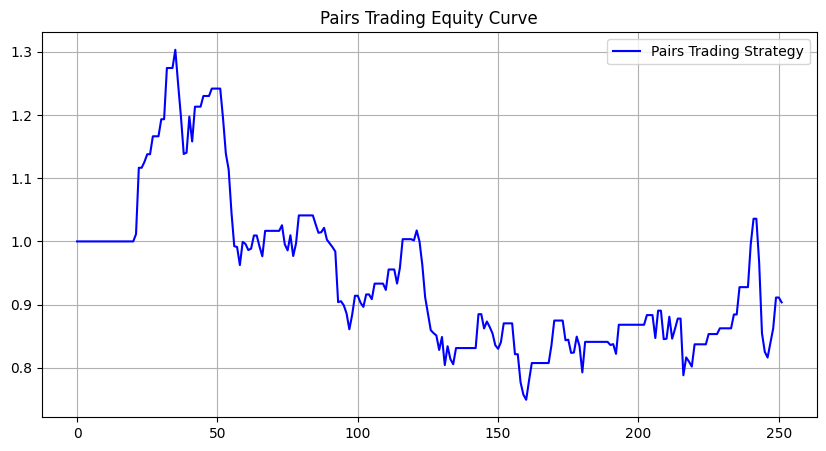

In [7]:
plt.figure(figsize=(10,5))
plt.plot(strategy_cum, label="Pairs Trading Strategy", color='blue')
plt.title("Pairs Trading Equity Curve")
plt.grid(True)
plt.legend()
plt.show()